In [1]:
import os
import random

import numpy as np
import pandas as pd
from skimage import io
import torch
import cv2
from torch.utils import data
from torch.utils.data import DataLoader
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from skimage import color
import matplotlib.pyplot as plt

In [2]:
# echo "export SIMEPU_DATA='/home/maparla/DeepLearning/Datasets/SIMEPU'" >> ~/.bashrc
SIMEPU_DATA_PATH = os.environ.get('SIMEPU_DATA')

In [3]:
SIMEPU_PATHS = pd.read_csv(os.path.join(SIMEPU_DATA_PATH, "data_paths.csv"))

In [4]:
with open(os.path.join(SIMEPU_DATA_PATH, "labels2targets.pkl"), 'rb') as f:
    LABELS2TARGETS = pickle.load(f)
with open(os.path.join(SIMEPU_DATA_PATH, "targets2labels.pkl"), 'rb') as f:
    TARGETS2LABELS = pickle.load(f)

In [5]:
class SIMEPU_Dataset(data.Dataset):
    def __init__(self, data_partition='', data_augmentation=None, validation_size=0.15, seed=42):
        """
          - data_partition:
             -> Si esta vacio ("") devuelve todas las muestras de todo el TRAIN
             -> Si es "train" devuelve '1-validation_size' muestras de todo el TRAIN
             -> Si es "validation" devuelve 'validation_size' muestras de todo el TRAIN
        """
        
        if data_partition == "train": 
            self.data_paths = SIMEPU_PATHS.sample(frac=1-validation_size, random_state=seed)
        elif data_partition == "validation": 
            self.data_paths = SIMEPU_PATHS.sample(frac=validation_size, random_state=seed)
        elif data_partition == "":
            self.data_paths = SIMEPU_PATHS
        else:
            assert False, "Wrong data partition!"
        
        self.data_partition = data_partition
        self.data_augmentation = data_augmentation

    def __getitem__(self, idx):
        try:
            img_path = self.data_paths.iloc[idx]["path"]
            target = int(self.data_paths.iloc[idx]["target"])
            img = cv2.imread(img_path)
        except:
            print("Error at idx {}".format(idx))
        
        if self.data_augmentation:
            try: img = self.transform(image=img)['image']
            except: assert False, "Transform error in file: " + str(img_path)
        
        img = torch.from_numpy(img.transpose(2,0,1))

        return img, target
        

    def __len__(self):
        return len(self.data_paths)

In [6]:
train_dataset = SIMEPU_Dataset(data_partition="train")
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [10]:
xbatch, ybatch = next(iter(train_loader))

In [11]:
xbatch.shape

torch.Size([32, 3, 512, 512])

Text(0.5, 1.0, 'Sin daño')

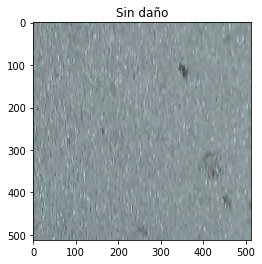

In [12]:
plt.imshow(xbatch[0].data.cpu().numpy().transpose(1,2,0))
plt.title(TARGETS2LABELS[ybatch[0].item()])